Баданина Наталья ПМ17-1

Тема: Классификация текстов методами машинного обучения.

Данные: https://www.kaggle.com/yutkin/corpus-of-russian-news-articles-from-lenta

**Подключение библиотек**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#!pip install maru
import maru
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

from warnings import filterwarnings
filterwarnings('ignore')

**Загрузка датасета**

Данные - корпус новостей с сайта lenta.ru

In [2]:
news = pd.read_csv('lenta-ru-news.csv')

In [3]:
news.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


**Анализ данных**

Целевой переменной для классификации могут выступать ```topic```, ```tags```. Заметим, что значений ```tags``` больше и они конкретнее, чем значения ```topic```. Целевой переменной для первичной модели можно взять ```tags```, исключив ```topic``` из модели. В дальнейшем можно подумать что сделать с исключенной колонкой.

In [200]:
news.tags.unique()

array(['Первая мировая', 'Все', nan, 'Прибалтика', 'Кино', 'Преступность',
       'Общество', 'Происшествия', 'Искусство', 'Бизнес', 'Техника',
       'ТВ и радио', 'Политика', 'Пресса', 'Музыка', 'Люди', 'Звери',
       'Игры', 'Госэкономика', 'Гаджеты', 'Наука', 'Еда', 'Рынки',
       'Деньги', 'Летние виды', 'Интернет', 'Театр', 'Конфликты',
       'Реклама', 'Космос', 'Бокс и ММА', 'Футбол', 'Книги',
       'Зимние виды', 'Достижения', 'Coцсети', 'Вещи', 'События',
       'Средняя Азия', 'Украина', 'Закавказье', 'Белоруссия', 'Молдавия',
       'Софт', 'Квартира', 'Город', 'Дача', 'Офис', 'Оружие', 'Мнения',
       'Москва', 'Регионы', 'Полиция и спецслужбы', 'Криминал',
       'Следствие и суд', 'Движение', 'Производители', 'Мировой бизнес',
       'Финансы компаний', 'Деловой климат', 'Мир', 'Россия', 'Часы',
       'Явления', 'Стиль', 'Инструменты', 'Вооружение', 'Вкусы',
       'Страноведение', 'Госрегулирование', 'История', 'Внешний вид',
       'Автобизнес', 'Аналитика рынка'

In [201]:
news.topic.unique()

array(['Библиотека', 'Россия', 'Мир', 'Экономика', 'Интернет и СМИ',
       'Спорт', 'Культура', 'Из жизни', 'Силовые структуры',
       'Наука и техника', 'Бывший СССР', nan, 'Дом', 'Сочи', 'ЧМ-2014',
       'Путешествия', 'Ценности', 'Легпром', 'Бизнес', 'МедНовости',
       'Оружие', '69-я параллель', 'Культпросвет ', 'Крым'], dtype=object)

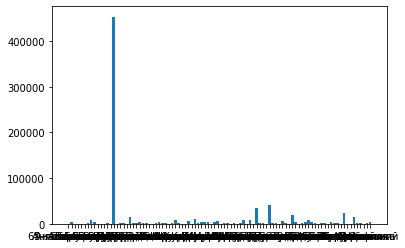

In [4]:
tags_count = news.tags.groupby(news.tags).count()
plt.bar(tags_count.index, tags_count)
plt.show()

In [8]:
np.where(tags_count==max(tags_count),tags_count.index,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Все', 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=object)

In [9]:
news[news.tags=='Все']

,url,title,text,topic,tags,date
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,Все,1999/08/31
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,Все,1999/08/31
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,Все,1999/08/31
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,Все,1999/08/31
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,Все,1999/08/31
...,...,...,...,...,...,...
800459,https://lenta.ru/news/2019/12/12/podarunok/,Названы самые популярные подарки на Новый год,"Конфеты, шоколад, косметика и парфюмерия стали...",NaN,Все,2019/12/12
800767,https://lenta.ru/news/2019/12/13/contract/,Раскрыты подробности нового контракта России и...,Источник в оборонной промышленности Турции рас...,NaN,Все,2019/12/13
800768,https://lenta.ru/news/2019/12/13/win/,Победители конкурса «Цифровой прорыв» получили...,Победители конкурса «Цифровой прорыв» — флагма...,NaN,Все,2019/12/13
800969,https://lenta.ru/news/2019/12/14/wada/,В WADA подтвердили право России на проведение ...,Всемирное антидопинговое агентство (WADA) подт...,NaN,Все,2019/12/14


In [10]:
news.isnull().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

In [5]:
news = news.drop('url', axis=1)
news = news.drop(news[news.tags.isnull()].index, axis=0)
news = news.drop(news[news.topic.isnull()].index, axis=0)

In [6]:
news = news.drop(news[news.text.isnull()].index, axis=0)

In [7]:
news = news.drop('date', axis=1)

In [8]:
news = news.drop(news[news.tags=='Все'].index,axis=0)

In [9]:
news = news.reset_index()

In [10]:
news = news.drop('index', axis=1)

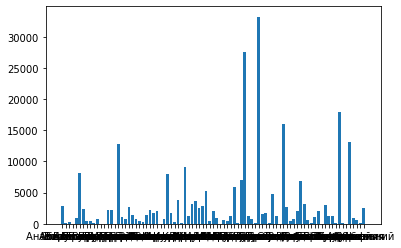

In [12]:
tags_count = news.tags.groupby(news.tags).count()
plt.bar(tags_count.index, tags_count)
plt.show()

In [14]:
np.where(tags_count==max(tags_count),tags_count.index,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Политика', 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=object)

In [11]:
news

,title,text,topic,tags
0,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая
1,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая
2,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая
3,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая
4,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая
...,...,...,...,...
259068,«Желтые жилеты» прорвали кордон полиции под «М...,Протесты движения «желтых жилетов» в Париже сн...,Мир,Происшествия
259069,Су-27 разбился на Украине,Истребитель Су-27 разбился в Житомирской облас...,Бывший СССР,Украина
259070,В Петербурге нашли квартиру из 58 комнат,В Московском районе Санкт-Петербурга на продаж...,Дом,Квартира
259071,Падение горнолыжника на полной скорости попало...,Швейцарский горнолыжник Марк Гизин неудачно пр...,Спорт,Зимние виды


In [24]:
news.isnull().sum()

title    0
text     0
topic    0
tags     0
dtype: int64

https://github.com/chomechome/maru

In [15]:
sw_ru = set(stopwords.words('russian'))

In [40]:
def get_lemmatize_str(s):
    s = s.lower()
    s = re.findall(r'[а-я-]+', s)
    s = [word for word in s if not word in sw_ru]
    
    analyzer = maru.get_analyzer(tagger='crf', lemmatizer='pymorphy')
    a = analyzer.analyze(s)
    
    answer = np.array([])
    for morph in a:
        answer = np.append(answer, morph)
        #answer.append(morph[1])
    
    return set(answer)

In [47]:
news.text[10]

'На трассе в Канаде произошло ДТП с участием медведя. Как сообщает Fox News, в результате инцидента погибли два человека. Инцидент произошел поздно вечером в понедельник, 6 июня, на трассе в районе города Люксвиль, провинция Квебек. Автомобиль Pontiac Sunfire сбил медведя, вышедшего на дорогу. От удара животное отбросило на встречную полосу, по которой в этот момент двигался джип Nissan Pathfinder. По словам полицейских, удар был такой силы, что 200-килограммовый медведь прошиб собой лобовое стекло джипа, пролетел сквозь машину и вывалился из окна задней двери. Во внедорожнике находились трое человек. От столкновения с летящим медведем 25-летняя женщина, сидевшая за рулем, погибла на месте. Также погиб 40-летний пассажир, сидевший сзади за водительским сиденьем. 28-летний бойфренд женщины выжил, хотя и сидел на переднем сиденье. Медведь от полученных травм также скончался. Уточняется, что речь идет о молодом барибале или черном медведе - самом распространенном представителе медвежьих в

In [48]:
%%time
' '.join(get_lemmatize_str(news.text[10]))

CPU times: user 95.4 ms, sys: 82.2 ms, total: 178 ms
Wall time: 244 ms


'такой стекло погибнуть сзади результат участвовать вечер пока известно который гибнуть супружеский объяснять отмечать вывалиться участие превышать задний ограничение передний чёрный -летний выжить водительский дорога скорость километр сообщать признаваться олень установить кто-то внедорожник обтекаемый себя также сила понедельник провинция скоростной сквозь минимум час удар место хотя уточняться полицейский издание молодой лобовой лететь год животное встречный следователь выйти момент помнить - понтиак авария отбросить пассажир другой трое бойфренд представитель поздно скончаться люксвиль машина медведь случиться полиция втора находиться руль конструкция случай травма речь слово столкновение идти получить джип северный америка женщина водитель окно сам инцидент автомобиль подбросить человек особенность дтп произойти распространить необычный называть город полоса прошибить сидение воздух район влететь июнь квебек канада сидеть пара медвежий барибал дверь пьяный сбить -килограммовый дви

In [49]:
news_ = news.copy()

In [50]:
%%time
for i in range(len(news_.title)):
    news_.title[i] = get_lemmatize_str(news_.title[i])

KeyboardInterrupt: 

In [34]:
from sklearn.preprocessing import LabelEncoder

In [258]:
label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(news.tags)

In [315]:
news_ = news.copy()
news_.tags = corpus_encoded

In [266]:
x = news_.drop(['tags','topic'], axis=1)
y = news_.tags

In [284]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [285]:
x_train = x_train.reset_index()